In [3]:
!pip install scikit-learn

  Using cached scikit_learn-1.8.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (8.9 MB)
Using cached scipy-1.16.3-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Load credit card data
credit_data = pd.read_csv('../data/raw/creditcard.csv')

print(f"Dataset Shape: {credit_data.shape}")
print(f"\nClass Distribution:")
print(credit_data['Class'].value_counts())
print(f"\nFraud Percentage: {credit_data['Class'].mean() * 100:.4f}%")

Dataset Shape: (284807, 31)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud Percentage: 0.1727%


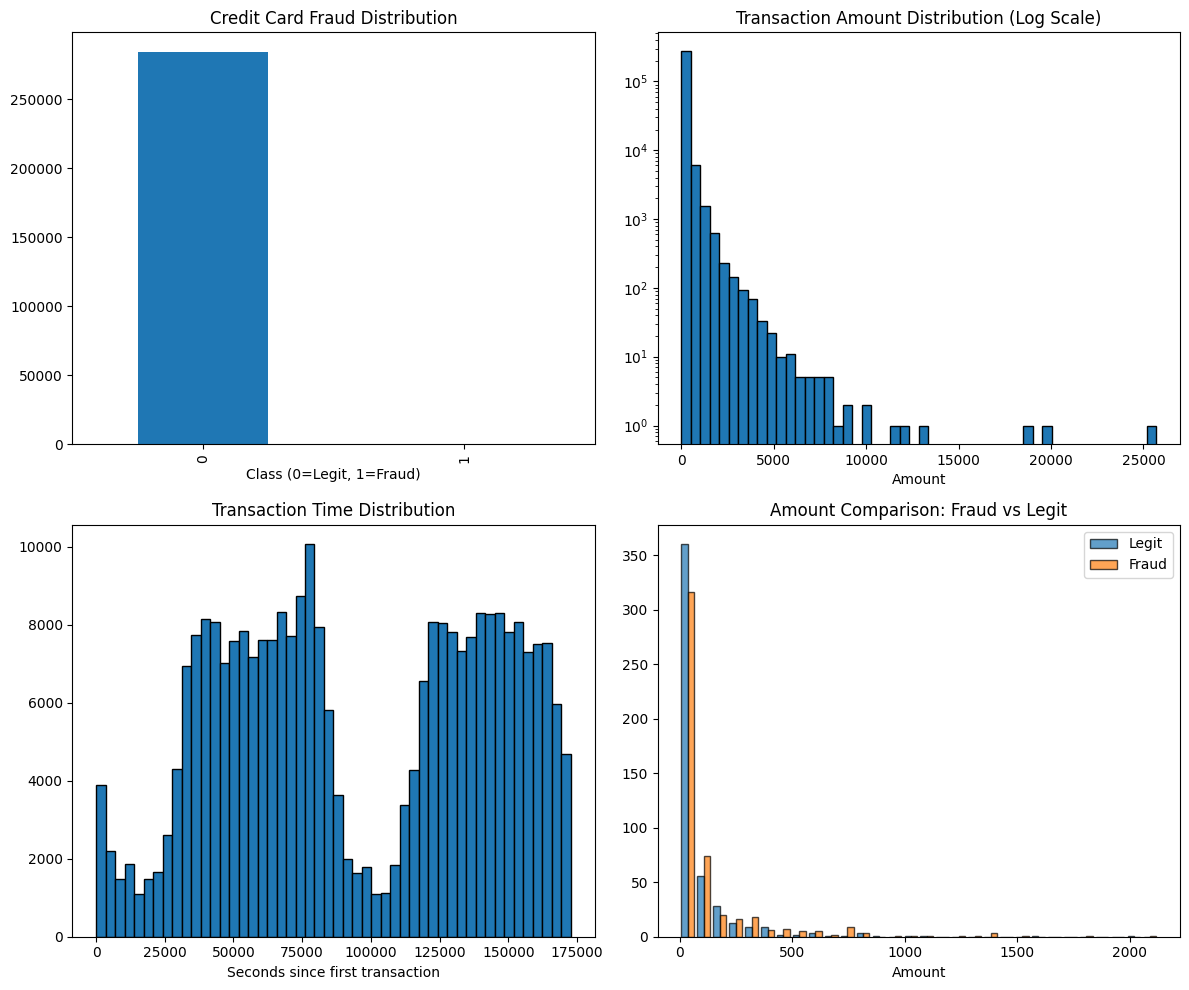

In [5]:
# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Class distribution
credit_data['Class'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Credit Card Fraud Distribution')
axes[0,0].set_xlabel('Class (0=Legit, 1=Fraud)')

# Amount distribution
axes[0,1].hist(credit_data['Amount'], bins=50, edgecolor='black', log=True)
axes[0,1].set_title('Transaction Amount Distribution (Log Scale)')
axes[0,1].set_xlabel('Amount')

# Time distribution
axes[1,0].hist(credit_data['Time'], bins=50, edgecolor='black')
axes[1,0].set_title('Transaction Time Distribution')
axes[1,0].set_xlabel('Seconds since first transaction')

# Fraud vs Legit amount comparison
fraud_amounts = credit_data[credit_data['Class'] == 1]['Amount']
legit_amounts = credit_data[credit_data['Class'] == 0]['Amount'].sample(n=len(fraud_amounts))

axes[1,1].hist([legit_amounts, fraud_amounts], bins=30, label=['Legit', 'Fraud'], 
               edgecolor='black', alpha=0.7)
axes[1,1].set_title('Amount Comparison: Fraud vs Legit')
axes[1,1].set_xlabel('Amount')
axes[1,1].legend()

plt.tight_layout()
plt.savefig('../data/processed/creditcard_eda.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Check for anomalies in PCA features
anomaly_stats = pd.DataFrame()
for col in [f'V{i}' for i in range(1, 29)]:
    fraud_mean = credit_data[credit_data['Class'] == 1][col].mean()
    legit_mean = credit_data[credit_data['Class'] == 0][col].mean()
    anomaly_stats[col] = [fraud_mean, legit_mean, abs(fraud_mean - legit_mean)]

anomaly_stats.index = ['Fraud Mean', 'Legit Mean', 'Difference']
print("Top 10 features with largest mean differences:")
print(anomaly_stats.loc['Difference'].abs().nlargest(10))

Top 10 features with largest mean differences:
V3     7.045452
V14    6.983787
V17    6.677371
V12    6.270225
V10    5.686707
V7     5.578368
V1     4.780206
V4     4.549889
V16    4.147110
V11    3.806749
Name: Difference, dtype: float64
